<a href="https://colab.research.google.com/github/Tanaz370/TuteDude-Data-Science/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 0.6630, Accuracy = 0.33
Epoch 100: Loss = 1.0192, Accuracy = 1.00
Epoch 200: Loss = 0.9669, Accuracy = 1.00
Epoch 300: Loss = 0.8475, Accuracy = 1.00
Epoch 400: Loss = 0.6934, Accuracy = 1.00
Epoch 500: Loss = 0.5483, Accuracy = 1.00
Epoch 600: Loss = 0.4340, Accuracy = 1.00
Epoch 700: Loss = 0.3481, Accuracy = 1.00
Epoch 800: Loss = 0.2848, Accuracy = 1.00
Epoch 900: Loss = 0.2385, Accuracy = 1.00


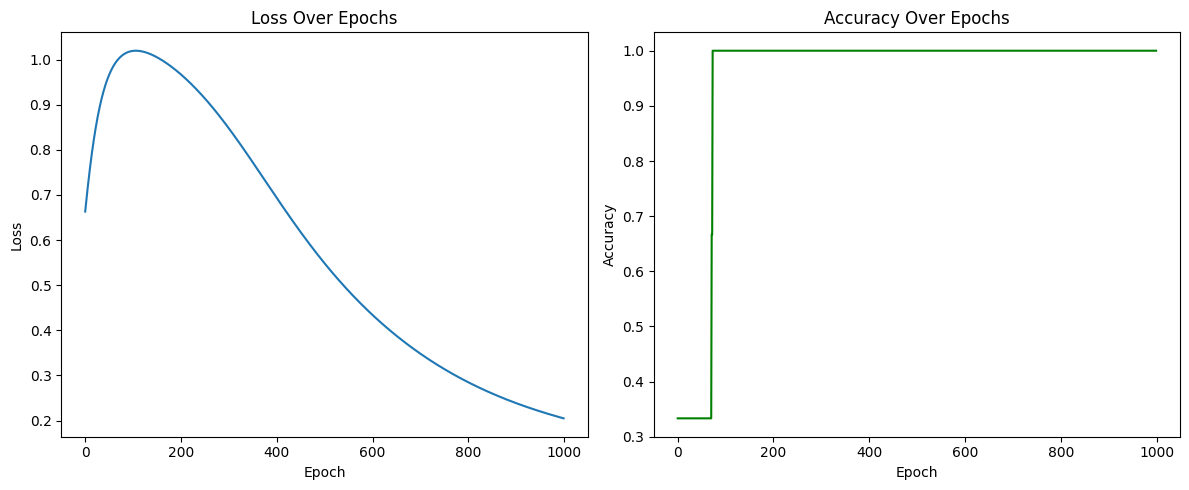


Actual: A, Predicted: A


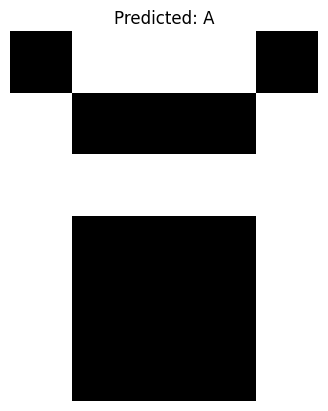


Actual: B, Predicted: B


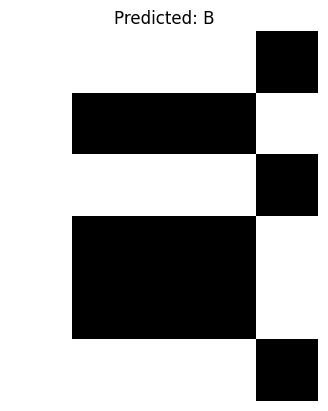


Actual: C, Predicted: C


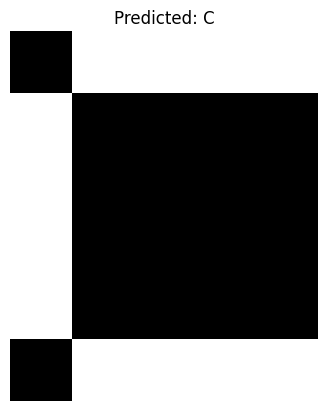

In [11]:
#The dataset
#The neural network (forward + backprop)
#Training loop
#Accuracy and loss visualization
#Testing with imshow to display predictions
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Activation Functions
# -------------------------

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# -------------------------
# 2. Dataset (A, B, C images as 5x6 pixels)
# -------------------------

def get_dataset():
    A = np.array([
        [0,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,1],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [1,0,0,0,1]
    ]).flatten()

    B = np.array([
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [1,1,1,1,0]
    ]).flatten()

    C = np.array([
        [0,1,1,1,1],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [0,1,1,1,1]
    ]).flatten()

    X = np.array([A, B, C])
    Y = np.array([
        [1, 0, 0],  # A
        [0, 1, 0],  # B
        [0, 0, 1]   # C
    ])
    return X, Y

# -------------------------
# 3. Neural Network Class
# -------------------------

class NeuralNetwork:
    def __init__(self, input_size=30, hidden_size=16, output_size=3, learning_rate=0.1):
        self.lr = learning_rate
        self.w1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, Y):
        m = X.shape[0]
        d_a2 = self.a2 - Y
        d_z2 = d_a2 * sigmoid_derivative(self.z2)
        d_w2 = self.a1.T @ d_z2 / m
        d_b2 = np.sum(d_z2, axis=0, keepdims=True) / m

        d_a1 = d_z2 @ self.w2.T
        d_z1 = d_a1 * sigmoid_derivative(self.z1)
        d_w1 = X.T @ d_z1 / m
        d_b1 = np.sum(d_z1, axis=0, keepdims=True) / m

        self.w1 -= self.lr * d_w1
        self.b1 -= self.lr * d_b1
        self.w2 -= self.lr * d_w2
        self.b2 -= self.lr * d_b2

    def compute_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        loss = -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m
        return loss

    def accuracy(self, Y_pred, Y_true):
        return np.mean(np.argmax(Y_pred, axis=1) == np.argmax(Y_true, axis=1))

# -------------------------
# 4. Training the Network
# -------------------------

X, Y = get_dataset()
nn = NeuralNetwork()

losses = []
accuracies = []

for epoch in range(1000):
    output = nn.forward(X)
    nn.backward(X, Y)

    loss = nn.compute_loss(output, Y)
    acc = nn.accuracy(output, Y)

    losses.append(loss)
    accuracies.append(acc)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.2f}")

# -------------------------
# 5. Plot Loss and Accuracy
# -------------------------

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses, label='Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

# -------------------------
# 6. Testing the Network
# -------------------------

def show_prediction(index):
    test_input = X[index]
    prediction = nn.forward(np.array([test_input]))
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(Y[index])

    print(f"\nActual: {'ABC'[actual_label]}, Predicted: {'ABC'[predicted_label]}")
    plt.imshow(test_input.reshape(6,5), cmap='gray')
    plt.title(f"Predicted: {'ABC'[predicted_label]}")
    plt.axis('off')
    plt.show()

# Show predictions for A, B, C
for i in range(3):
    show_prediction(i)
